In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
dflogistic = pd.read_csv('C:/Users/Public/lmaaya/projects/python/JupiterNoteBook/data/dflogistic.csv')
dflogistic.head(2)

,age,have_insurance
0,22,0
1,25,0


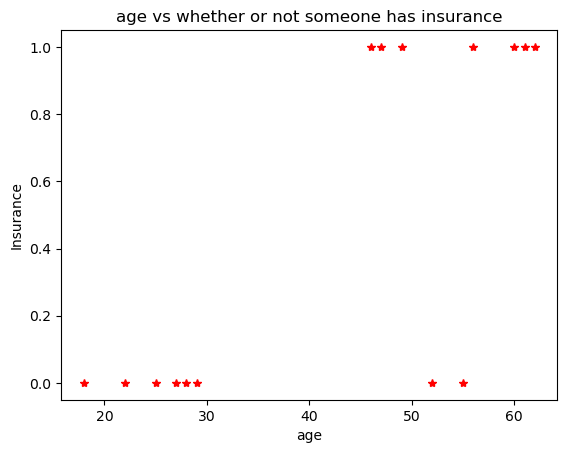

In [45]:
plt.xlabel('age')
plt.ylabel('Insurance')
plt.title('age vs whether or not someone has insurance')

plt.plot(dflogistic['age'], dflogistic['have_insurance'], 'r*')
plt.show()

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(dflogistic[['age']], dflogistic.have_insurance, test_size=0.1)

In [48]:
X_train.head(2)

,age
5,56
1,25


In [49]:
X_test

,age
6,55
9,61


In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [52]:
model.coef_

array([[0.20935079]])

In [53]:
model.predict(X_test)

array([1, 1], dtype=int64)

model.score(X_test, Y_test)

In [55]:
model.predict_proba(X_test)

array([[0.07891072, 0.92108928],
       [0.02381481, 0.97618519]])

In [56]:
#model.predict([[25]])

dflogistic_test2 = pd.read_csv('C:/Users/Public/lmaaya/projects/python/JupiterNoteBook/data/dflogistic_test.csv')
model.predict(dflogistic_test2[['age']])

array([0, 1, 1, 0], dtype=int64)

# Exercise
Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics

1. Now do some exploratory analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or leave to work elsewhere)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing correlation between departments and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model



# Multiclass logistic regression
## Load datasets from sklearn

In [57]:
from sklearn.datasets import load_digits

In [58]:
digits = load_digits()

In [59]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [61]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

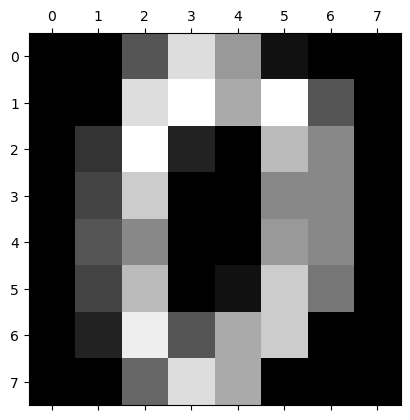

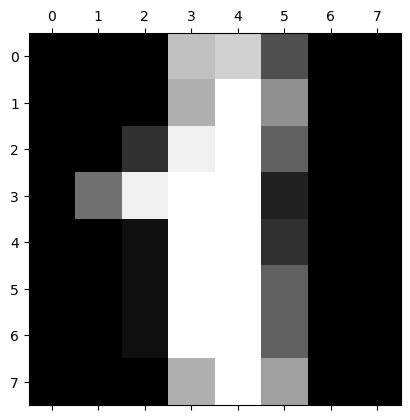

In [66]:
plt.gray()
for i in range(2):
    plt.matshow(digits.images[i])
    plt.show()

In [67]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [85]:
len(X_train)

1437

In [86]:
len(X_test)

360

In [103]:
from sklearn.linear_model import LogisticRegression
modelMult = LogisticRegression(max_iter=10000)


In [104]:
modelMult.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [105]:
#modelMult.coef_
modelMult.predict([digits.data[67]])

array([6])

In [106]:
modelMult.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [108]:
modelMult.score(X_test, Y_test)

0.9666666666666667

## create a confusion matrix

In [99]:
y_predicted = model.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_predicted)
#cm

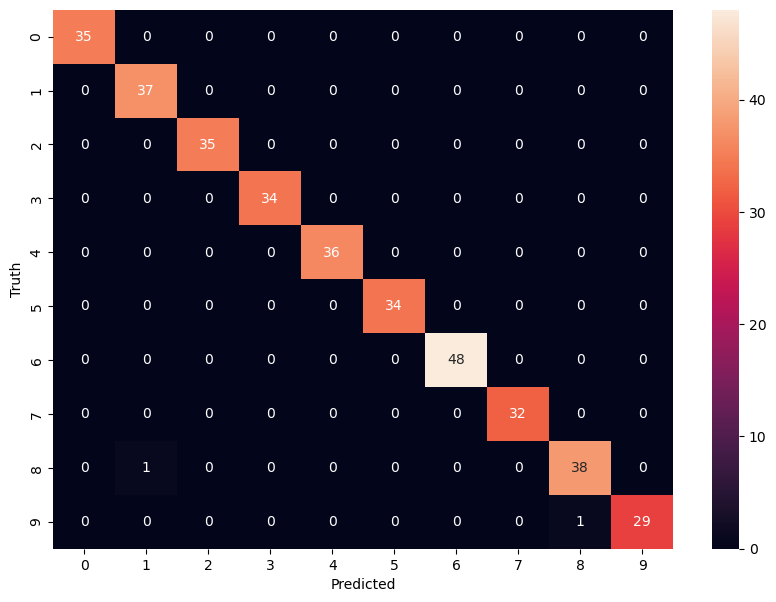

In [101]:
import seaborn as sn
plt.figure(figsize= (10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()